In [8]:
!pip install fredapi > /dev/null

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_key = '49c19100f7cc1a62f62e4528282cf2d9'


In [69]:
fred = Fred(api_key=fred_key)
fred.search('S&P', order_by='popularity')

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2024-01-23   2024-01-23   
CSUSHPINSA              CSUSHPINSA     2024-01-23   2024-01-23   
SP500                        SP500     2024-01-23   2024-01-23   
MEHOINUSA672N        MEHOINUSA672N     2024-01-23   2024-01-23   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2024-01-23   2024-01-23   
...                            ...            ...          ...   
CSHXCPVEA156NRUG  CSHXCPVEA156NRUG     2024-01-23   2024-01-23   
CSHXCPETA156NRUG  CSHXCPETA156NRUG     2024-01-23   2024-01-23   
CSHMCPCFA156NRUG  CSHMCPCFA156NRUG     2024-01-23   2024-01-23   
CSHMCPROA156NRUG  CSHMCPROA156NRUG     2024-01-23   2024-01-23   
CSHRCPQAA156NRUG  CSHRCPQAA156NRUG     2024-01-23   2024-01-23   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
MEHOINUSA672N     Real Median Household Income in the United States   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
...                                                             ...   
CSHXCPVEA156NRUG  Share of Merchandise Exports at Current Purcha...   
CSHXCPETA156NRUG  Share of Merchandise Exports at Current Purcha...   
CSHMCPCFA156NRUG  Share of Merchandise Imports at Current Purcha...   
CSHMCPROA156NRUG  Share of Merchandise Imports at Current Purcha...   
CSHRCPQAA156NRUG  Share of Residual Trade and GDP Statistical Di...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2024-01-22  Daily, Close   
CSUSHPINSA              1987-01-01      2023-10-01       Monthly   
SP500                   2014-01-24      2024-01-23  Daily, Close   
MEHOINUSA672N           1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY          1996-12-31      2024-01-22  Daily, Close   
...                            ...             ...           ...   
CSHXCPVEA156NRUG        1950-01-01      2019-01-01        Annual   
CSHXCPETA156NRUG        1950-01-01      2019-01-01        Annual   
CSHMCPCFA156NRUG        1960-01-01      2019-01-01        Annual   
CSHMCPROA156NRUG        1960-01-01      2019-01-01        Annual   
CSHRCPQAA156NRUG        1970-01-01      2019-01-01        Annual   

                 frequency_short                           units  \
series id                                                          
BAMLH0A0HYM2                   D                         Percent   
CSUSHPINSA                     M              Index Jan 2000=100   
SP500                          D                           Index   
MEHOINUSA672N                  A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY                 D                         Percent   
...                          ...                             ...   
CSHXCPVEA156NRUG               A                         Percent   
CSHXCPETA156NRUG               A                         Percent   
CSHMCPCFA156NRUG               A                         Percent   
CSHMCPROA156NRUG               A                         Percent   
CSHRCPQAA156NRUG               A                         Percent   

                               units_short      seasonal_adjustment  \
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted   
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
SP500                                Index  Not Seasonally Adjusted   
MEHOINUSA672N     2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seaso

<Axes: title={'center': 'S&P 500'}>

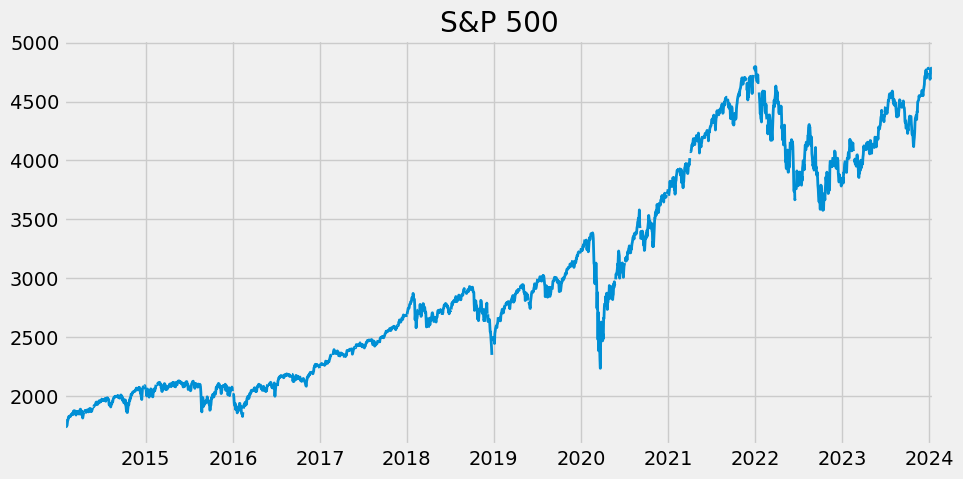

In [70]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='S&P 500', lw = 2)

In [71]:
unemp_df = fred.search('unemployment rate in state', filter =('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]
unemp_df

id realtime_start realtime_end  \
series id                                                                
CAUR                                  CAUR     2024-01-23   2024-01-23   
TXUR                                  TXUR     2024-01-23   2024-01-23   
NYUR                                  NYUR     2024-01-23   2024-01-23   
FLUR                                  FLUR     2024-01-23   2024-01-23   
OHUR                                  OHUR     2024-01-23   2024-01-23   
ALUR                                  ALUR     2024-01-23   2024-01-23   
PAUR                                  PAUR     2024-01-23   2024-01-23   
MIUR                                  MIUR     2024-01-23   2024-01-23   
ILUR                                  ILUR     2024-01-23   2024-01-23   
COUR                                  COUR     2024-01-23   2024-01-23   
MAUR                                  MAUR     2024-01-23   2024-01-23   
NCUR                                  NCUR     2024-01-23   2024-01-23   
MNUR                                  MNUR     2024-01-23   2024-01-23   
NJUR                                  NJUR     2024-01-23   2024-01-23   
GAUR                                  GAUR     2024-01-23   2024-01-23   
VAUR                                  VAUR     2024-01-23   2024-01-23   
AZUR                                  AZUR     2024-01-23   2024-01-23   
INUR                                  INUR     2024-01-23   2024-01-23   
KYUR                                  KYUR     2024-01-23   2024-01-23   
IAUR                                  IAUR     2024-01-23   2024-01-23   
WIUR                                  WIUR     2024-01-23   2024-01-23   
TNUR                                  TNUR     2024-01-23   2024-01-23   
LASMT261982000000003  LASMT261982000000003     2024-01-23   2024-01-23   
ORUR                                  ORUR     2024-01-23   2024-01-23   
ARUR                                  ARUR     2024-01-23   2024-01-23   
SCUR                                  SCUR     2024-01-23   2024-01-23   
MDUR                                  MDUR     2024-01-23   2024-01-23   
WAUR                                  WAUR     2024-01-23   2024-01-23   
NVUR                                  NVUR     2024-01-23   2024-01-23   
WVUR                                  WVUR     2024-01-23   2024-01-23   
LAUR                                  LAUR     2024-01-23   2024-01-23   
AKUR                                  AKUR     2024-01-23   2024-01-23   
UTUR                                  UTUR     2024-01-23   2024-01-23   
OKUR                                  OKUR     2024-01-23   2024-01-23   
MOUR                                  MOUR     2024-01-23   2024-01-23   
PRUR                                  PRUR     2024-01-23   2024-01-23   
NMUR                                  NMUR     2024-01-23   2024-01-23   
HIUR                                  HIUR     2024-01-23   2024-01-23   
NDUR                                  NDUR     2024-01-23   2024-01-23   
CTUR                                  CTUR     2024-01-23   2024-01-23   
MSUR                                  MSUR     2024-01-23   2024-01-23   
MTUR                                  MTUR     2024-01-23   2024-01-23   
IDUR                                  IDUR     2024-01-23   2024-01-23   
DCUR                                  DCUR     2024-01-23   2024-01-23   
KSUR                                  KSUR     2024-01-23   2024-01-23   
WYUR                                  WYUR     2024-01-23   2024-01-23   
MEUR                                  MEUR     2024-01-23   2024-01-23   
NEUR                                  NEUR     2024-01-23   2024-01-23   
NHUR                                  NHUR     2024-01-23   2024-01-23   
RIUR                                  RIUR     2024-01-23   2024-01-23   
DEUR                                  DEUR     2024-01-23   2024-01-23   
SDUR                                  SDUR     2024-01-23   2024-01-23   
LASMT391746000000003  LASMT391746000000003  

<Axes: title={'center': 'Unemployment Rate'}>

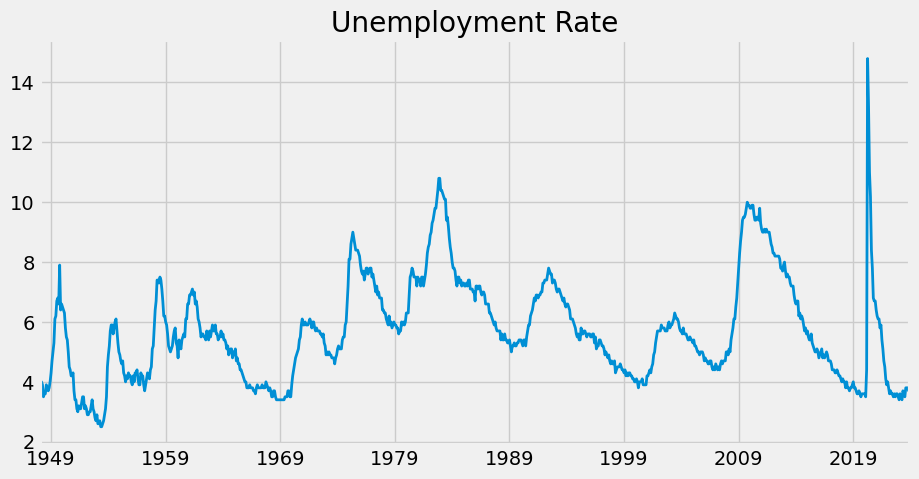

In [72]:
unrate = fred.get_series('UNRATE')
unrate.plot(figsize=(10,5), title='Unemployment Rate', lw = 2)

In [73]:
unemp_df.index

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'OHUR', 'ALUR', 'PAUR', 'MIUR', 'ILUR',
       'COUR', 'MAUR', 'NCUR', 'MNUR', 'NJUR', 'GAUR', 'VAUR', 'AZUR', 'INUR',
       'KYUR', 'IAUR', 'WIUR', 'TNUR', 'LASMT261982000000003', 'ORUR', 'ARUR',
       'SCUR', 'MDUR', 'WAUR', 'NVUR', 'WVUR', 'LAUR', 'AKUR', 'UTUR', 'OKUR',
       'MOUR', 'PRUR', 'NMUR', 'HIUR', 'NDUR', 'CTUR', 'MSUR', 'MTUR', 'IDUR',
       'DCUR', 'KSUR', 'WYUR', 'MEUR', 'NEUR', 'NHUR', 'RIUR', 'DEUR', 'SDUR',
       'LASMT391746000000003', 'VTUR', 'CMWRUR', 'CNEWUR', 'CSOUUR', 'CNERUR',
       'USAURAMS', 'CWSTUR'],
      dtype='object', name='series id')

In [87]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_states = pd.concat(all_results, axis=1).drop(['PRUR','LASMT261982000000003','LASMT391746000000003', 'CMWRUR','CNEWUR','CSOUUR','CNERUR','USAURAMS','CWSTUR'],axis=1)

In [88]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [89]:
#plot states unemployment rate
px.line(unemp_states)

# Pull April 2020 Unemployment Rate Per State

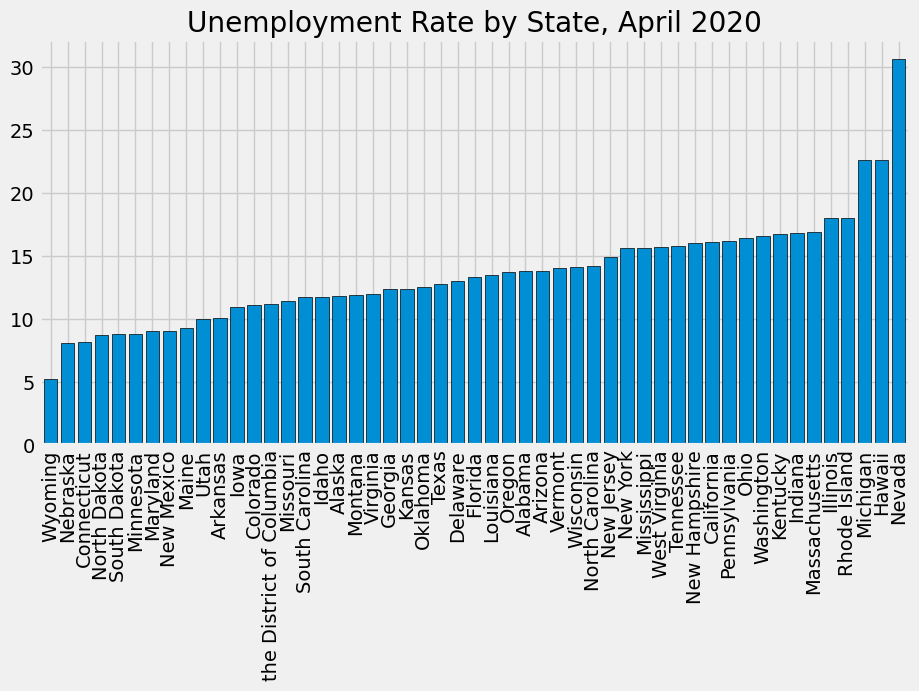

In [90]:
ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind='bar', figsize=(10,5), width =0.8, edgecolor = 'black', 
      title= 'Unemployment Rate by State, April 2020')
ax.legend().remove()
plt.show()

# Pull Participation Rate

In [91]:
part_df = fred.search('participation rate state', filter =('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Participation Rate for')]
part_df

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-01-23   2024-01-23   
LBSSA01    LBSSA01     2024-01-23   2024-01-23   
LBSSA12    LBSSA12     2024-01-23   2024-01-23   
LBSSA26    LBSSA26     2024-01-23   2024-01-23   
LBSSA27    LBSSA27     2024-01-23   2024-01-23   
LBSSA21    LBSSA21     2024-01-23   2024-01-23   
LBSSA55    LBSSA55     2024-01-23   2024-01-23   
LBSSA36    LBSSA36     2024-01-23   2024-01-23   
LBSSA28    LBSSA28     2024-01-23   2024-01-23   
LBSSA24    LBSSA24     2024-01-23   2024-01-23   
LBSSA39    LBSSA39     2024-01-23   2024-01-23   
LBSSA42    LBSSA42     2024-01-23   2024-01-23   
LBSSA48    LBSSA48     2024-01-23   2024-01-23   
LBSSA25    LBSSA25     2024-01-23   2024-01-23   
LBSSA49    LBSSA49     2024-01-23   2024-01-23   
LBSSA23    LBSSA23     2024-01-23   2024-01-23   
LBSSA54    LBSSA54     2024-01-23   2024-01-23   
LBSSA37    LBSSA37     2024-01-23   2024-01-23   
LBSSA08    LBSSA08     2024-01-23   2024-01-23   
LBSSA35    LBSSA35     2024-01-23   2024-01-23   
LBSSA47    LBSSA47     2024-01-23   2024-01-23   
LBSSA13    LBSSA13     2024-01-23   2024-01-23   
LBSSA19    LBSSA19     2024-01-23   2024-01-23   
LBSSA17    LBSSA17     2024-01-23   2024-01-23   
LBSSA45    LBSSA45     2024-01-23   2024-01-23   
LBSSA18    LBSSA18     2024-01-23   2024-01-23   
LBSSA51    LBSSA51     2024-01-23   2024-01-23   
LBSSA22    LBSSA22     2024-01-23   2024-01-23   
LBSSA40    LBSSA40     2024-01-23   2024-01-23   
LBSSA04    LBSSA04     2024-01-23   2024-01-23   
LBSSA02    LBSSA02     2024-01-23   2024-01-23   
LBSSA29    LBSSA29     2024-01-23   2024-01-23   
LBSSA31    LBSSA31     2024-01-23   2024-01-23   
LBSSA33    LBSSA33     2024-01-23   2024-01-23   
LBSSA53    LBSSA53     2024-01-23   2024-01-23   
LBSSA50    LBSSA50     2024-01-23   2024-01-23   
LBSSA41    LBSSA41     2024-01-23   2024-01-23   
LBSSA34    LBSSA34     2024-01-23   2024-01-23   
LBSSA16    LBSSA16     2024-01-23   2024-01-23   
LBSSA09    LBSSA09     2024-01-23   2024-01-23   
LBSSA38    LBSSA38     2024-01-23   2024-01-23   
LBSSA05    LBSSA05     2024-01-23   2024-01-23   
LBSSA32    LBSSA32     2024-01-23   2024-01-23   
LBSSA15    LBSSA15     2024-01-23   2024-01-23   
LBSSA20    LBSSA20     2024-01-23   2024-01-23   
LBSSA46    LBSSA46     2024-01-23   2024-01-23   
LBSSA30    LBSSA30     2024-01-23   2024-01-23   
LBSSA10    LBSSA10     2024-01-23   2024-01-23   
LBSSA44    LBSSA44     2024-01-23   2024-01-23   
LBSSA56    LBSSA56     2024-01-23   2024-01-23   
LBSSA11    LBSSA11     2024-01-23   2024-01-23   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA49              Labor Force Participation Rate for Utah   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA37    Labor Force Participation Rate for North Carolina   
LBSSA08          Labor Force Participation Rate for Colorado   
LBSSA35        Labor 

In [92]:
id_to_state_part = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

In [93]:
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)

In [94]:
part_states.columns = [id_to_state_part[c] for c in part_states.columns]

In [95]:
part_states

California  Alabama  Florida  Michigan  Minnesota  Kentucky  \
1976-01-01        62.6     57.0     55.8      61.6       65.6      60.5   
1976-02-01        62.4     56.9     55.7      61.5       65.5      60.3   
1976-03-01        62.2     56.8     55.5      61.5       65.4      60.2   
1976-04-01        62.2     56.8     55.5      61.6       65.4      60.1   
1976-05-01        62.3     56.8     55.4      61.7       65.5      60.1   
...                ...      ...      ...       ...        ...       ...   
2023-08-01        62.4     57.0     59.7      61.3       68.5      57.6   
2023-09-01        62.3     57.0     59.8      61.6       68.5      57.4   
2023-10-01        62.3     57.0     59.8      61.8       68.5      57.3   
2023-11-01        62.2     57.1     59.7      62.1       68.3      57.1   
2023-12-01        62.2     57.2     59.6      62.2       68.1      57.0   

            Wisconsin  New York  Mississippi  Maryland  Ohio  Pennsylvania  \
1976-01-01       65.6      58.0         58.8      64.3  61.7          58.4   
1976-02-01       65.5      58.0         58.6      64.2  61.7          58.3   
1976-03-01       65.4      58.0         58.5      64.1  61.7          58.3   
1976-04-01       65.4      58.0         58.5      64.1  61.6          58.3   
1976-05-01       65.5      58.1         58.5      64.1  61.6          58.3   
...               ...       ...          ...       ...   ...           ...   
2023-08-01       65.7      61.5         54.3      65.3  62.1          61.9   
2023-09-01       65.8      61.6         54.1      65.2  62.1          61.9   
2023-10-01       65.8      61.6         53.9      65.2  62.0          61.9   
2023-11-01       65.9      61.7         53.8      65.2  62.0          62.0   
2023-12-01       65.9      61.6         53.8      65.2  61.9          62.1   

            Texas  Massachusetts  Utah  Maine  West Virginia  North Carolina  \
1976-01-01   63.8           64.8  62.8   62.1           52.5            66.5   
1976-02-01   63.5           64.7  62.6   61.9           52.4            66.3   
1976-03-01   63.4           64.6  62.5   61.9           52.3            66.2   
1976-04-01   63.5           64.6  62.5   61.8           52.3            66.2   
1976-05-01   63.6           64.6  62.6   61.7           52.2            66.3   
...           ...            ...   ...    ...            ...             ...   
2023-08-01   64.2           64.5  69.8   58.6           54.9            60.8   
2023-09-01   64.2           64.4  69.7   58.7           55.1            60.9   
2023-10-01   64.2           64.5  69.6   58.8           55.2            60.9   
2023-11-01   64.2           64.6  69.5   59.0           55.2            60.9   
2023-12-01   64.1           64.9  69.3   59.0           55.3            60.8   

            Colorado  New Mexico  Tennessee  Georgia  Iowa  Illinois  \
1976-01-01      67.2        60.8       59.6     63.7  64.4      63.0   
1976-02-01      67.0        60.5       59.4     63.6  64.3      63.0   
1976-03-01      66.8        60.3       59.3     63.5  64.2      62.9   
1976-04-01      66.6        60.3       59.3     63.5  64.1      62.9   
1976-05-01      66.5        60.3       59.4     63.6  64.1      63.0   
...              ...         ...        ...      ...   ...       ...   
2023-08-01      68.7        57.2       59.4     61.4  68.7      64.4   
2023-09-01      68.6        57.2       59.4     61.5  68.6      64.5   
2023-10-01      68.4        57.2       59.4     61.6  68.4      64.5   
2023-11-01      68.4        57.3       59.4     61.6  68.1      64.7   
2023-12-01      68.4        57.3       59.4     61.6  67.7      64.7   

            South Carolina  Indiana  Virginia  Louisiana  Oklahoma  Arizona  \
1976-01-01            65.3     64.0      65.9       56.8      59.3     59.5   
1976-02-01            65.2     63.9      65.8       56.6      59.2     59.2   
1976-03-01            65.0     63.8      65.6       56.5      59.1     59.1   
1976-04-01            64.9     6

In [96]:
px.line(part_states)

# Unemployment vs Participation

In [97]:
unemp_states = unemp_states.rename(columns={'the District of Columbia' : 'District Of Columbia'})

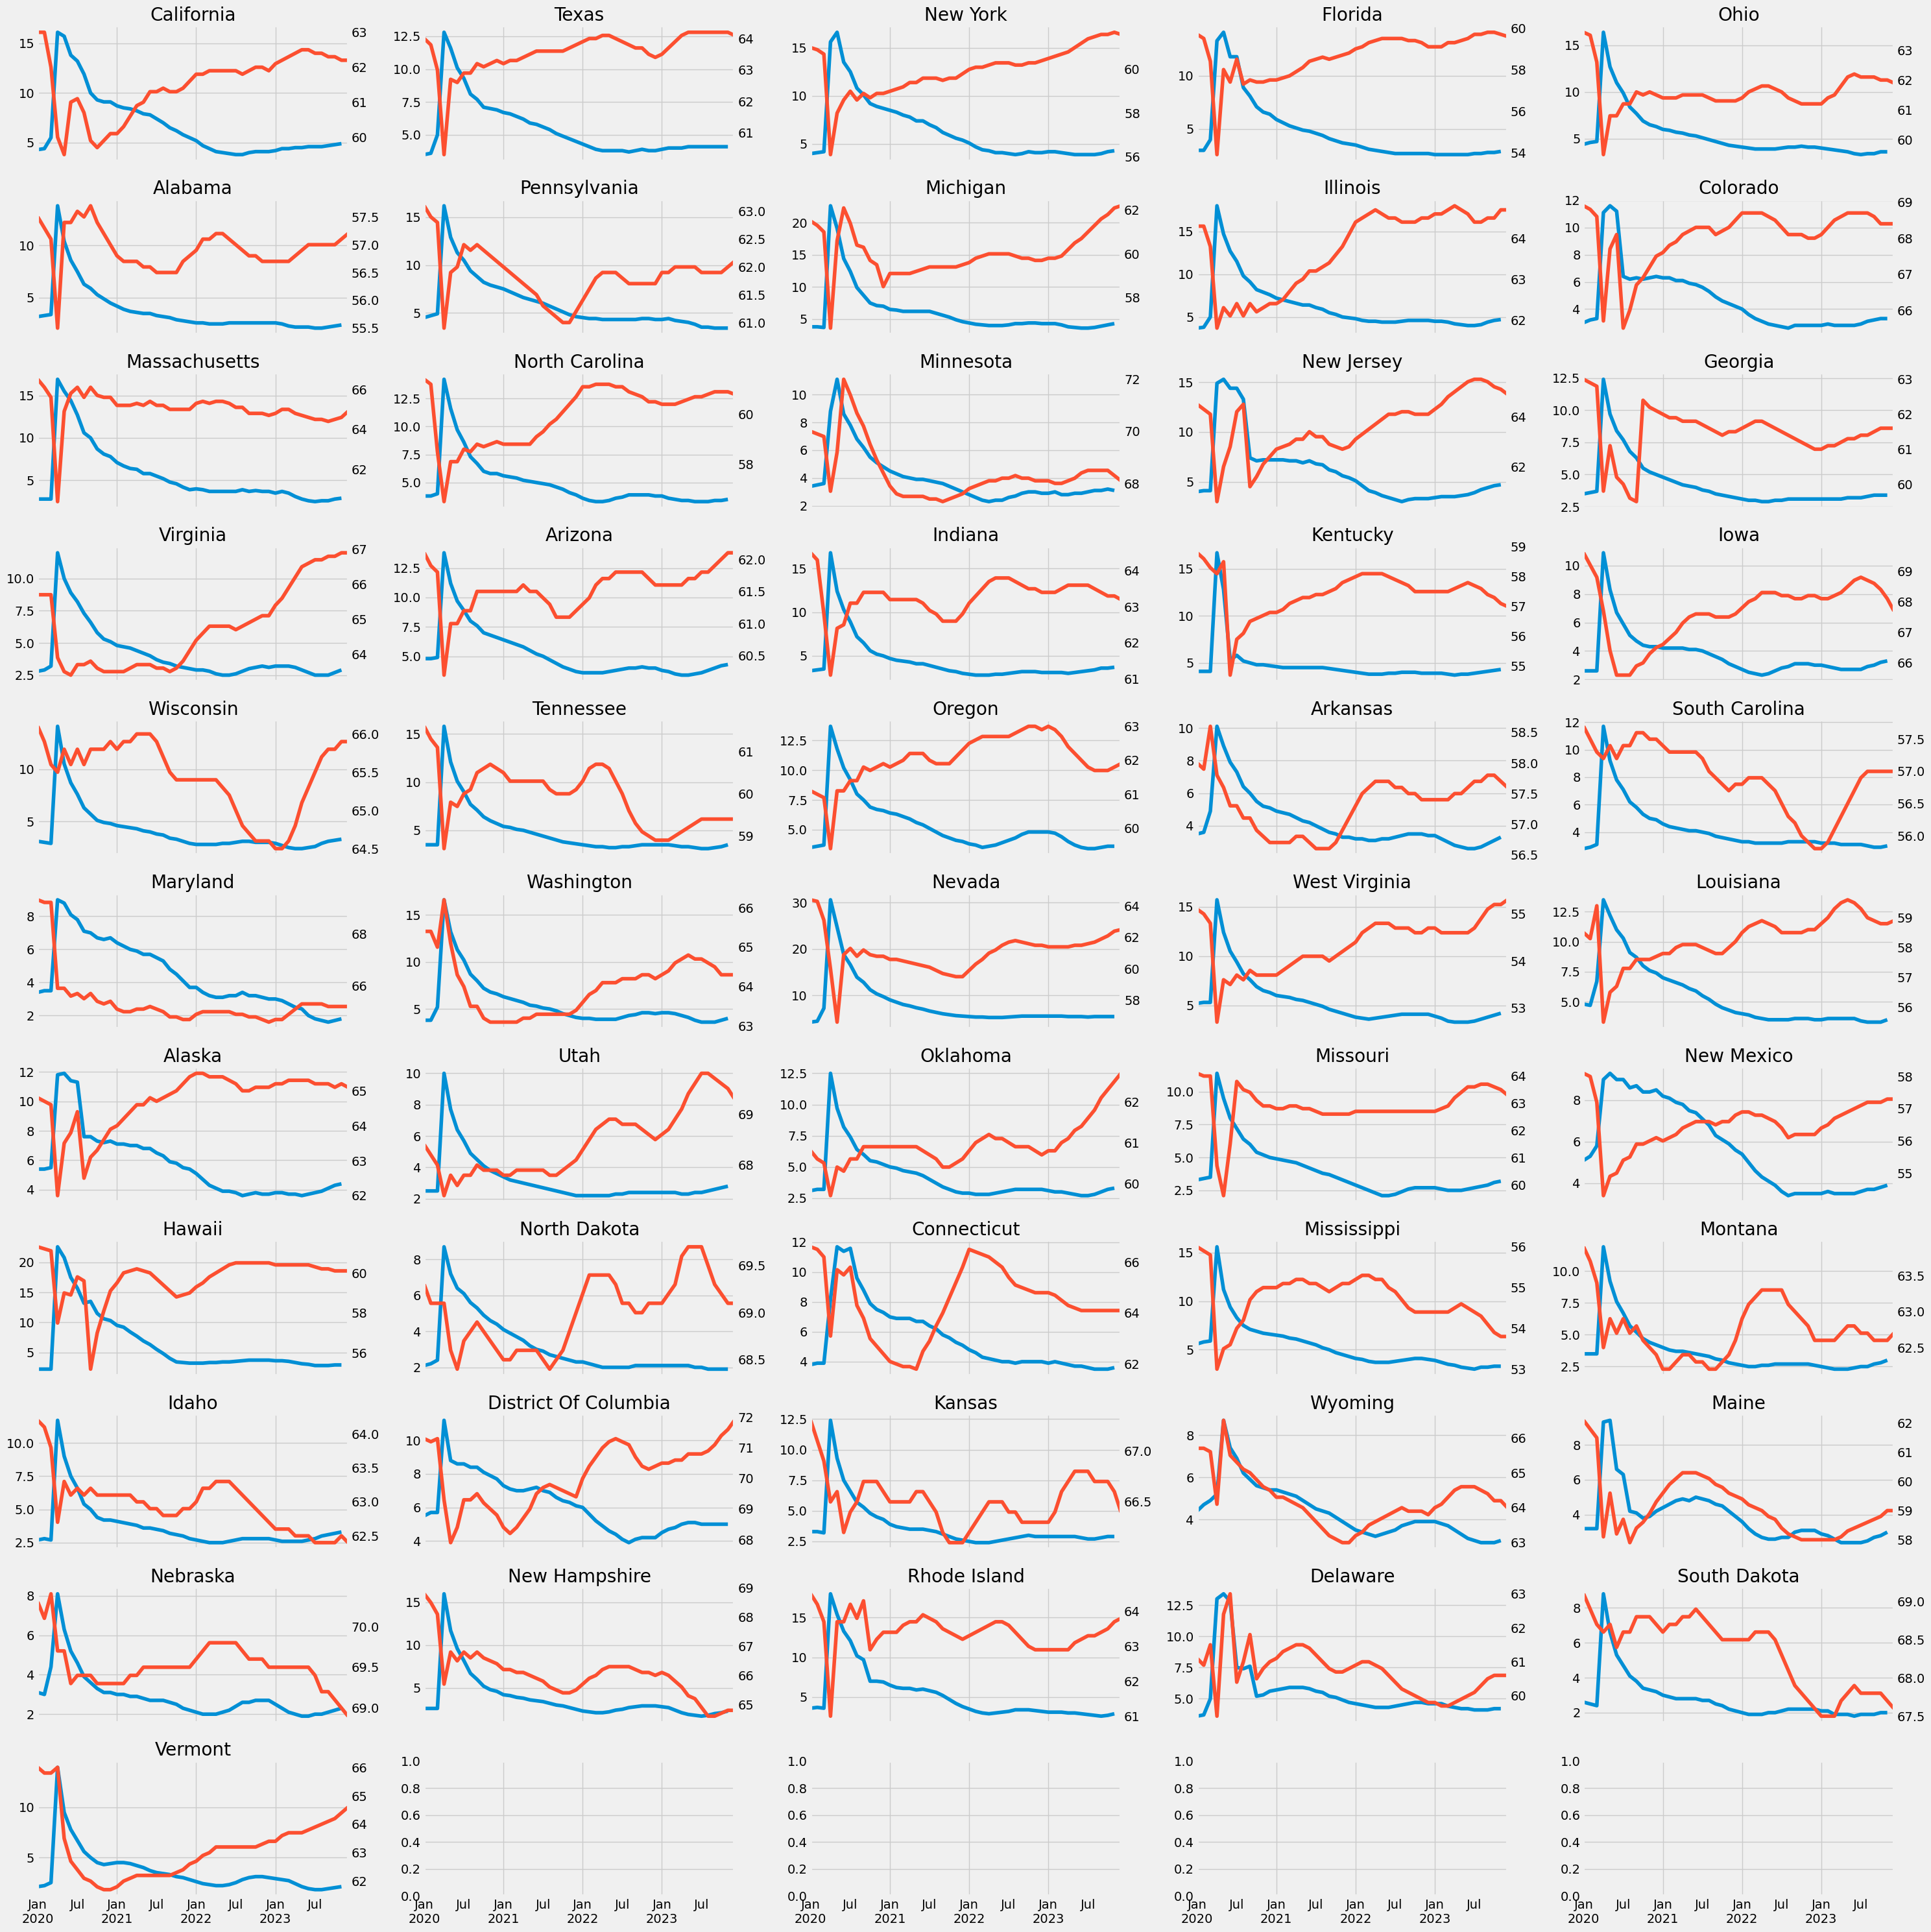

In [104]:
num_states = len(unemp_states.columns)

num_columns = 5
num_rows = -(-num_states // num_columns)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(30, 30), sharex =True )
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state == "District of Columbia":
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index <= 2024')[state].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index <= 2024')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()